In [1]:
import geopandas as gpd
gdf = gpd.read_file('../data/xenium/stardist_all.geojson')


/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_31764/3197470832.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_centroids['geometry'] = gdf_centroids.geometry.centroid


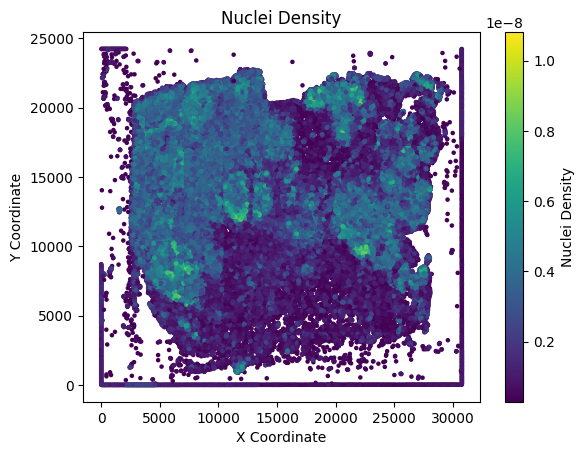

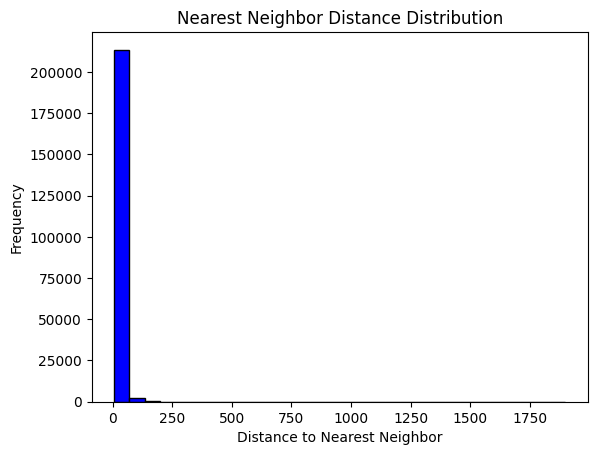

In [3]:
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Convert geometries to centroids, just so i can access x and y
gdf_centroids = gdf.copy()
gdf_centroids['geometry'] = gdf_centroids.geometry.centroid
x = gdf_centroids.geometry.x.values
y = gdf_centroids.geometry.y.values
xy = np.vstack([x, y]).T

# Kernel Density Estimation
kde = KernelDensity(bandwidth=50).fit(xy)
density = np.exp(kde.score_samples(xy))

plt.scatter(x, y, c=density, cmap='viridis', s=5)
plt.colorbar(label='Nuclei Density')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Nuclei Density')
plt.show()

# Nearest Neighbor Distance
from scipy.spatial import KDTree
tree = KDTree(xy)
distances, _ = tree.query(xy, k=2)  # k=2 because the nearest neighbor is the point itself
nearest_neighbor_distances = distances[:, 1]  # Distance to the actual nearest neighbor

plt.hist(nearest_neighbor_distances, bins=30, color='blue', edgecolor='black')
plt.xlabel('Distance to Nearest Neighbor')
plt.ylabel('Frequency')
plt.title('Nearest Neighbor Distance Distribution')
plt.show()


In [5]:
mean_density = np.mean(density)
std_density = np.std(density)
max_density = np.max(density)
min_density = np.min(density)

print(f"Mean Density: {mean_density}")
print(f"Standard Deviation of Density: {std_density}")
print(f"Maximum Density: {max_density}")
print(f"Minimum Density: {min_density}")


Mean Density: 3.477612772358749e-09
Standard Deviation of Density: 1.461533287539403e-09
Maximum Density: 1.0810734587572116e-08
Minimum Density: 2.9425049450092303e-10


In [6]:
mean_nnd = np.mean(nearest_neighbor_distances)
std_nnd = np.std(nearest_neighbor_distances)
min_nnd = np.min(nearest_neighbor_distances)
max_nnd = np.max(nearest_neighbor_distances)

print(f"Mean Nearest Neighbor Distance: {mean_nnd}")
print(f"Standard Deviation of NND: {std_nnd}")
print(f"Minimum NND: {min_nnd}")
print(f"Maximum NND: {max_nnd}")

Mean Nearest Neighbor Distance: 26.066128677766745
Standard Deviation of NND: 16.492317439801585
Minimum NND: 7.873466081971187
Maximum NND: 1898.871525514848
